In [1]:
###############################################################################
# initial imports:

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
from scipy.integrate import simps
from getdist import plots, MCSamples
import color_utilities
import getdist
getdist.chains.print_load_details = False
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [6]:
###############################################################################
# initial settings:

# latex rendering:
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

# output folder:
out_folder = './paper_plots/'
if not os.path.exists(out_folder):
    os.mkdir(out_folder)

# plot size in cm. Has to match to draft to make sure font sizes are consistent
x_size = 18.0
y_size = 7
main_fontsize = 10.0

In [16]:
###############################################################################
# generate data:

x_1 = np.linspace(-4, 4, 1000)
x_2 = np.linspace(-4, 4, 1000)

y_1p1 = np.sin(x_1)
y_1p2 = np.sin(2.*x_1)
y_1p3 = np.sin(3.*x_1)

y_2p1 = np.sin(x_2)
y_2p2 = np.sin(2.*x_2)
y_2p3 = np.sin(3.*x_2)



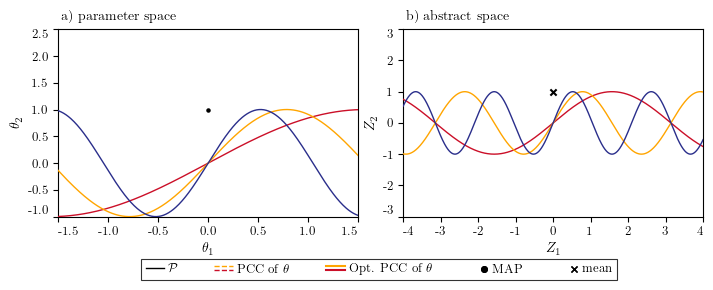

In [35]:
###############################################################################
# do the plot:

# create figure:
fig = plt.gcf()
fig.set_size_inches(x_size/2.54, y_size/2.54)

# create plot grid and distribute the axes:
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# plot data:
ax1.plot(x_1, y_1p1, lw=1., ls='-', color=color_utilities.nice_colors(0), zorder=999.)
ax1.plot(x_1, y_1p2, lw=1., ls='-', color=color_utilities.nice_colors(1), zorder=999.)
ax1.plot(x_1, y_1p3, lw=1., ls='-', color=color_utilities.nice_colors(2), zorder=999.)

ax2.plot(x_2, y_2p1, lw=1., ls='-', color=color_utilities.nice_colors(0), zorder=999.)
ax2.plot(x_2, y_2p2, lw=1., ls='-', color=color_utilities.nice_colors(1), zorder=999.)
ax2.plot(x_2, y_2p3, lw=1., ls='-', color=color_utilities.nice_colors(2), zorder=999.)

# MAP:
ax1.scatter(0.0, 1.0, s=5.0, color='k', zorder=999)

# mean:
ax2.scatter(0., 1., s=20.0, marker='x', color='k', zorder=999)

# limits:
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1, 2.5])

ax2.set_xlim([-3.0, 3.0])
ax2.set_ylim([-3.0, 3.0])

# ticks:
ticks = [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks, fontsize=0.9*main_fontsize);
ticks = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks, fontsize=0.9*main_fontsize);
for ax in [ax1, ax2]:
    ax.get_xticklabels()[0].set_horizontalalignment('left')
    ax.get_xticklabels()[-1].set_horizontalalignment('right')

ticks = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks, fontsize=0.9*main_fontsize);
ticks = [-3, -2, -1, 0, 1, 2, 3]
ax2.set_yticks(ticks)
ax2.set_yticklabels(ticks, fontsize=0.9*main_fontsize);
for ax in [ax1, ax2]:
    ax.get_yticklabels()[0].set_verticalalignment('bottom')
    ax.get_yticklabels()[-1].set_verticalalignment('top')

# axes labels:
ax1.set_xlabel(r'$\theta_1$', fontsize=main_fontsize);
ax1.set_ylabel(r'$\theta_2$', fontsize=main_fontsize);
ax2.set_xlabel(r'$Z_1$', fontsize=main_fontsize);
ax2.set_ylabel(r'$Z_2$', fontsize=main_fontsize);

# title:
ax1.text(0.01, 1.03, 'a) parameter space', verticalalignment='bottom', horizontalalignment='left', fontsize=main_fontsize, transform=ax1.transAxes)
ax2.text(0.01, 1.03, 'b) abstract space', verticalalignment='bottom', horizontalalignment='left', fontsize=main_fontsize, transform=ax2.transAxes)


# legend:
from matplotlib.legend_handler import HandlerBase
class object_1():
    pass
class AnyObjectHandler1(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], color=color_utilities.nice_colors(1), ls='--', lw=1.)
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], color=color_utilities.nice_colors(0), ls='--', lw=1.)
        return [l1, l2]

class object_2():
    pass
class AnyObjectHandler2(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], color=color_utilities.nice_colors(1), lw=1.5, ls='-')
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], color=color_utilities.nice_colors(0), lw=1.5, ls='-')
        return [l1, l2]
class object_3():
    pass
class AnyObjectHandler3(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        #m1 = plt.scatter([x0+width],[.5*height], color = 'k', marker = 'x')
        l1 = plt.Line2D([x0+.15*width,y0+width - .15*width], [0.7*height,0.7*height], color='k', lw=4.8, ls='-', alpha = 0.2)
        l2 = plt.Line2D([x0,y0+width], [0.2*height,0.2*height], color='k', lw=1, ls='--')
        return [l1, l2]
class object_4():
    pass
class AnyObjectHandler4(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        #m1 = plt.scatter([x0+width],[.5*height], color = 'k', marker = 'x')
        m1 = plt.Line2D([x0+0.75*width,x0+0.75*width], [0.45*height,0.45*height], color='k', ls='None', marker = 'o', markersize = 4)
        return [m1]
class object_5():
    pass
class AnyObjectHandler5(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        #m1 = plt.scatter([x0+width],[.5*height], color = 'k', marker = 'x')
        m1 = plt.Line2D([x0+0.75*width,x0+0.75*width], [0.45*height,0.45*height], color='k', ls='None', marker = 'x', markersize = 5)
        return [m1]

leg_handlers = [mlines.Line2D([], [], lw=1., ls='-', color='k'),
                object_1,
                object_2,
                #object_3,
                object_4,
                object_5]
legend_labels = [r'$\mathcal{P}$',
                  'PCC of $\\theta$',
                  'Opt. PCC of $\\theta$',
                  #'Prior',
                  'MAP',
                  'mean']

leg = fig.legend(handles=leg_handlers,
                labels=legend_labels,
                handler_map={object_1: AnyObjectHandler1(), object_2: AnyObjectHandler2(), object_3: AnyObjectHandler3(), object_4: AnyObjectHandler4(), object_5: AnyObjectHandler5()},
                fontsize=0.9*main_fontsize,
                frameon=True,
                fancybox=False,
                edgecolor='k',
                ncol=len(legend_labels),
                borderaxespad=0.0,
                columnspacing=3.0,
                handlelength=1.5,
                handletextpad=0.3,
                loc = 'lower center', #mode='expand',
                bbox_to_anchor=(0.0, .01, 1.065, 0.9),
                )
leg.get_frame().set_linewidth(0.8)

# update dimensions:
bottom = .24
top = 0.92
left = 0.08
right = 0.99
wspace = 0.15
hspace = 0.15
gs.update(bottom=bottom, top=top, left=left, right=right,
          wspace=wspace, hspace=hspace)

# save figure:
#plt.savefig(out_folder+'/figure_11p1.pdf')
#plt.close('all')